1. Na análise de concessão de empréstimos, uma variável potencialmente importante é a
renda da pessoa. O gerente de um banco coleta uma base de dados de seus correntistas e
extrai a variável “renda mensal (R$)” para 50 pessoas. Embora se trate de uma variável
quantitativa, deseja realizar uma análise por meio de tabela de frequências. Neste sentido,
pede-se:
a)Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 4.001-
6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.
b) Em seguida, elabore a tabela de frequências para as faixas de renda acima.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('exercicio-1.xlsx')

In [3]:
df

,Renda
0,2894
1,3448
2,1461
3,2224
4,2501
5,1100
6,3560
7,5511
8,2901
9,10128


In [4]:
faixas_renda = [0, 2000, 4000, 6000, 8000, 10000, 12000]
categorias = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000']

df['Faixa de Renda'] = pd.cut(df['Renda'], bins=faixas_renda, labels=categorias)

In [8]:
# Crie a tabela de frequência das faixas de renda
tabela_frequencia = df['Faixa de Renda'].value_counts().reset_index()
tabela_frequencia.columns = ['Faixa de Renda', 'Frequência Absoluta']

In [10]:
# Ordene a tabela de frequência pelas faixas de renda (opcional)
tabela_frequencia = tabela_frequencia.sort_values(by='Faixa de Renda')

In [11]:
tabela_frequencia

,Faixa de Renda,Frequência Absoluta
2,0-2000,9
0,2001-4000,19
1,4001-6000,11
3,6001-8000,5
4,8001-10000,4
5,10001-12000,2


In [12]:
# Calcule a frequência relativa
total_amostras = len(df)
tabela_frequencia['Frequência Relativa'] = tabela_frequencia['Frequência Absoluta'] / total_amostras

In [13]:
# Calcule a frequência acumulada
tabela_frequencia['Frequência Acumulada'] = tabela_frequencia['Frequência Absoluta'].cumsum()

In [14]:
# Calcule a frequência relativa acumulada
tabela_frequencia['Frequência Relativa Acumulada'] = tabela_frequencia['Frequência Acumulada'] / total_amostras

In [15]:
tabela_frequencia

,Faixa de Renda,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Relativa Acumulada
2,0-2000,9,0.18,9,0.18
0,2001-4000,19,0.38,28,0.56
1,4001-6000,11,0.22,39,0.78
3,6001-8000,5,0.10,44,0.88
4,8001-10000,4,0.08,48,0.96
5,10001-12000,2,0.04,50,1.00


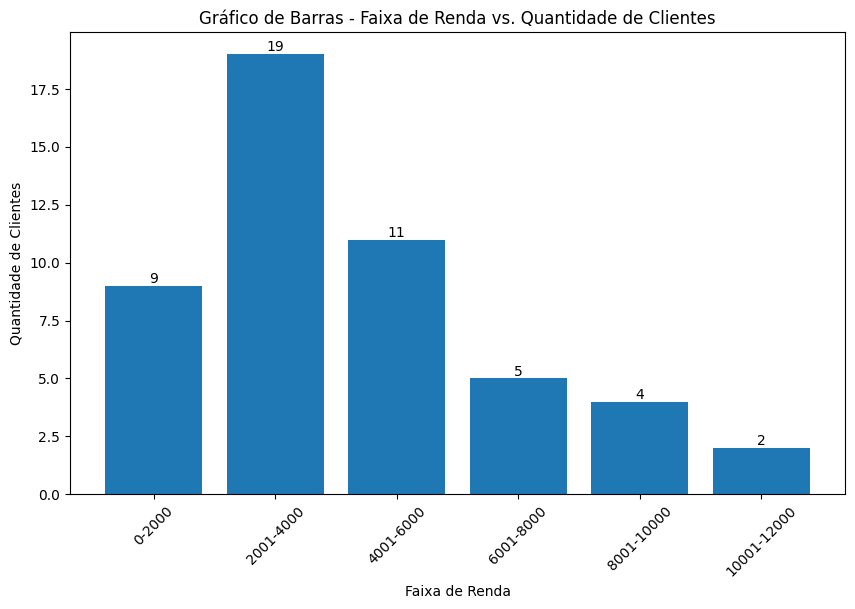

In [21]:
# Crie um gráfico de barras 2D
plt.figure(figsize=(10, 6))
plt.bar(tabela_frequencia['Faixa de Renda'], tabela_frequencia['Frequência Absoluta'])

# Adicione rótulos nas barras
for i, freq in enumerate(tabela_frequencia['Frequência Absoluta']):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

# Configure rótulos e títulos
plt.xlabel('Faixa de Renda')
plt.ylabel('Quantidade de Clientes')
plt.title('Gráfico de Barras - Faixa de Renda vs. Quantidade de Clientes')
plt.xticks(rotation=45)

plt.show()

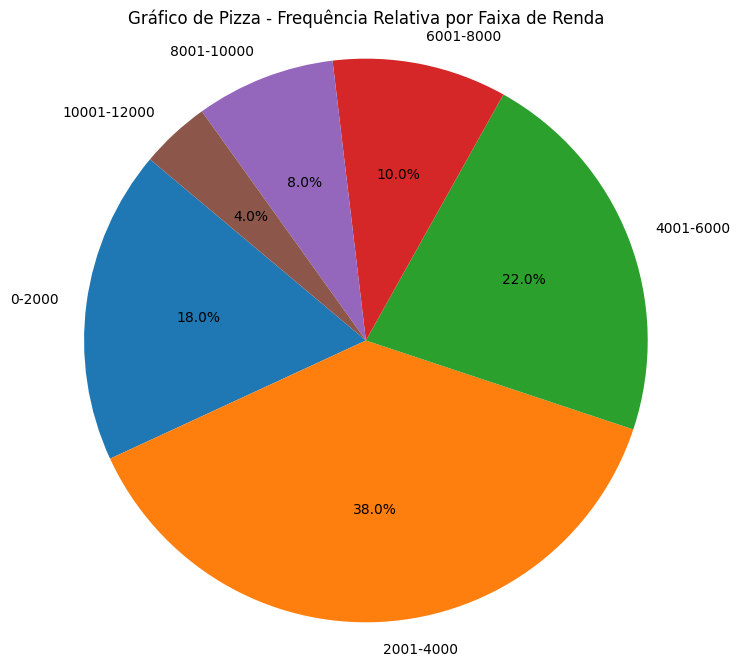

In [22]:
# Crie um gráfico de pizza com a frequência relativa
plt.figure(figsize=(8, 8))
plt.pie(tabela_frequencia['Frequência Relativa'], labels=tabela_frequencia['Faixa de Renda'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo

plt.title('Gráfico de Pizza - Frequência Relativa por Faixa de Renda')
plt.show()